In [354]:
import numpy as np
from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt
from numpy.random import rand
np.random.seed(0)

# Create sample data

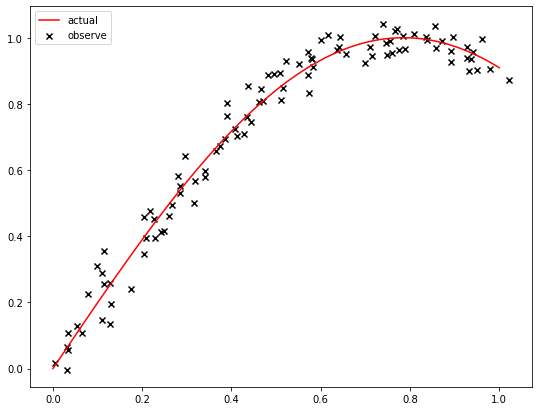

In [355]:
# Actual
N = 100
x_actual = np.linspace(0, 1, N)
y_actual = np.sin(x_actual * 2)

# Observe = actual + noise
x_observe = x_actual + (rand(N) - 0.5) * 0.1
y_observe = y_actual + (rand(N) - 0.5) * 0.1

# Plot
plt.figure(figsize=(9,7))
plt.plot(x_actual, y_actual, label='actual', color='red')
plt.scatter(x_observe, y_observe, label='observe', color='black', marker='x')
plt.legend()
plt.show()

# Apply Kalman Filter

Init Kalman Filter

In [356]:
kf = KalmanFilter(dim_x=4, dim_z=2)

kf.x = np.array([[0],     # position x
                [0],     # position y
                [0],     # velocity x
                [0]])    # velocity y

dt = 1 / len(x_actual)

# define state transition matrix
kf.F = np.array([[1, 0, dt, 0],
                [0, 1, 0, dt],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

# define measurement function
kf.H = np.array([[1, 0, 0, 0], 
                [0, 1, 0, 0]])

# define covariance matrix
kf.P = 1 * np.eye(4)

# measurement noise
kf.R = 10 * np.eye(2)

Apply

In [357]:
x_predict = []
y_predict = []
for x, y in zip(x_observe, y_observe):
    z = np.array([x, y])
    kf.predict()
    x_predict.append(kf.x[0][0])
    y_predict.append(kf.x[1][0])
    kf.update(z)
x_predict = np.array(x_predict)
y_predict = np.array(y_predict)


Plot

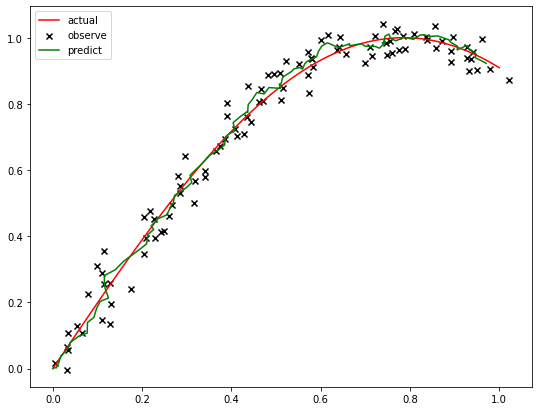

In [358]:
plt.figure(figsize=(9,7))
plt.plot(x_actual, y_actual, label='actual', color='red')
plt.scatter(x_observe, y_observe, label='observe', color='black', marker='x')
plt.plot(x_predict, y_predict, label='predict', color='green')
plt.legend()
plt.show()